In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.12.0'

In [4]:
model = keras.models.load_model('../models/cats.h5')

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

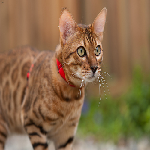

In [8]:
img = load_img('../dataset/lite_splitted/validation/Bengal/Bengal_12.jpg', target_size=(150, 150))
img

In [9]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
X.shape

(1, 150, 150, 3)

In [10]:
pred = model.predict(X)

2023-12-20 17:20:53.793669: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 6s 6s/step


In [12]:
import os

classes = os.listdir('../dataset/lite')
classes.remove('.DS_Store')
classes.sort()
classes

['Abyssinian',
 'American Curl',
 'Bengal',
 'British Shorthair',
 'Maine Coon',
 'Norwegian Forest',
 'Persian',
 'Russian Blue',
 'Siamese',
 'Sphynx']

In [13]:
dict(zip(classes, pred[0]))

{'Abyssinian': 1.617142e-07,
 'American Curl': 1.1249722e-06,
 'Bengal': 0.99999785,
 'British Shorthair': 8.252627e-09,
 'Maine Coon': 2.1197535e-09,
 'Norwegian Forest': 9.003965e-09,
 'Persian': 4.8829403e-09,
 'Russian Blue': 1.2476376e-08,
 'Siamese': 2.429964e-07,
 'Sphynx': 6.160706e-07}

In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/gz/rb99vhsj5qv6mj0nbyzrkffh0000gn/T/tmpr704jhku/assets


INFO:tensorflow:Assets written to: /var/folders/gz/rb99vhsj5qv6mj0nbyzrkffh0000gn/T/tmpr704jhku/assets
2023-12-20 17:24:47.729487: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-20 17:24:47.729507: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


In [15]:
with open('../models/cats.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [17]:
!ls -lh ../models

total 660064
-rw-r--r--  1 sergeybendak  staff   242M Dec 20 17:09 cats.h5
-rw-r--r--  1 sergeybendak  staff    80M Dec 20 17:26 cats.tflite


In [18]:
import tensorflow.lite as tflite

In [20]:
interpreter = tflite.Interpreter(model_path='../models/cats.tflite')
interpreter.allocate_tensors()

index_input = interpreter.get_input_details()[0]['index']
index_output = interpreter.get_output_details()[0]['index']

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
VERBOSE: Replacing 105 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 1 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.


In [21]:
interpreter.set_tensor(index_input, X)
interpreter.invoke()
pred_lite = interpreter.get_tensor(index_output)

dict(zip(classes, pred_lite[0]))

{'Abyssinian': 0.00014888254,
 'American Curl': 0.00039209804,
 'Bengal': 0.9989403,
 'British Shorthair': 5.4228727e-05,
 'Maine Coon': 0.00015009833,
 'Norwegian Forest': 1.9413452e-05,
 'Persian': 2.6402522e-05,
 'Russian Blue': 0.0001663744,
 'Siamese': 2.2406311e-05,
 'Sphynx': 7.981308e-05}

In [22]:
from PIL import Image

In [23]:
with Image.open('../dataset/lite_splitted/validation/Bengal/Bengal_12.jpg') as img:
    img = img.resize((150, 150), Image.NEAREST)

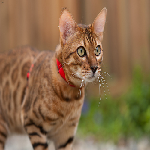

In [24]:
img

In [25]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [26]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [27]:
interpreter.set_tensor(index_input, X)
interpreter.invoke()
pred_lite = interpreter.get_tensor(index_output)

dict(zip(classes, pred_lite[0]))

{'Abyssinian': 0.00014888254,
 'American Curl': 0.00039209804,
 'Bengal': 0.9989403,
 'British Shorthair': 5.4228727e-05,
 'Maine Coon': 0.00015009833,
 'Norwegian Forest': 1.9413452e-05,
 'Persian': 2.6402522e-05,
 'Russian Blue': 0.0001663744,
 'Siamese': 2.2406311e-05,
 'Sphynx': 7.981308e-05}

In [28]:
# other way 

!pip install keras-image-helper


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [29]:
import tensorflow.lite as tflite
from keras_image_helper import create_preprocessor

In [31]:
interpreter = tflite.Interpreter(model_path='../models/cats.tflite')
interpreter.allocate_tensors()

index_input = interpreter.get_input_details()[0]['index']
index_output = interpreter.get_output_details()[0]['index']

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: Replacing 105 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 1 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.


In [32]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))

In [33]:
url = 'https://www.katdootje.nl/wp-content/uploads/Orange-Maine-Coon.webp'
X = preprocessor.from_url(url)
X.shape

(1, 150, 150, 3)

In [34]:
interpreter.set_tensor(index_input, X)
interpreter.invoke()
pred_lite = interpreter.get_tensor(index_output)

dict(zip(classes, pred_lite[0]))

{'Abyssinian': 0.00046576158,
 'American Curl': 4.7593137e-05,
 'Bengal': 0.0008479504,
 'British Shorthair': 0.000528494,
 'Maine Coon': 0.99260473,
 'Norwegian Forest': 0.003871024,
 'Persian': 0.00079441664,
 'Russian Blue': 0.00052148994,
 'Siamese': 0.00012460623,
 'Sphynx': 0.0001939761}